In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data prep

In [113]:
auto_mpg = pd.read_csv("auto-mpg.csv", header = 0)
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [114]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [115]:
checknan = auto_mpg.isnull().values.any()
print(f"Check if there are NaN values: {checknan}")
if checknan == False:
    print("Dataset has no missing values")
else:
    print("There are missing values")

Check if there are NaN values: False
Dataset has no missing values


### EDA

### Exploring values for MPG ( miles per gallon)

In [116]:
auto_mpg["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

### Distribution for MFG(fuel efficency)

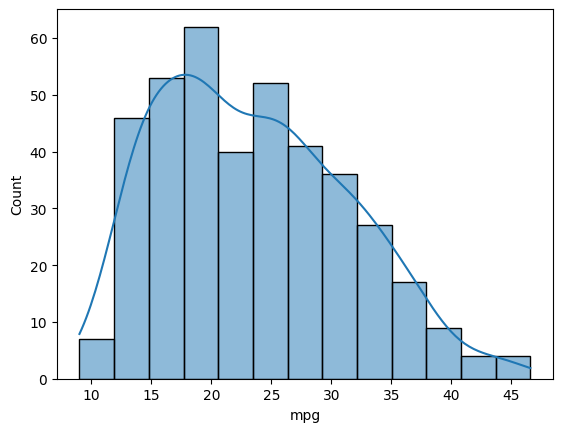

In [117]:
sns.histplot(auto_mpg["mpg"], kde=True);

MPG values look normally distributed, with a slight skew to the right. Lets double check using skew.

- skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 

- value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 

- value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [138]:
skew_mpg = auto_mpg["mpg"].skew()
print("Skew for column MPG is", skew_mpg.round(2), "which puts it at fairly symmetrical, close to being moderatly skewed to the right")


Skew for column MPG is 0.46 which puts it at fairly symmetrical, close to being moderatly skewed to the right


### Cylinders

In [139]:
auto_mpg["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

- Most of the cylinders are 4, 8 and 6. With a majority being at 4 cylinders. 

    From what little I know of cars

    More cylinders = Less fuel efficient = Lower MPG.

    So lets see if this is true.

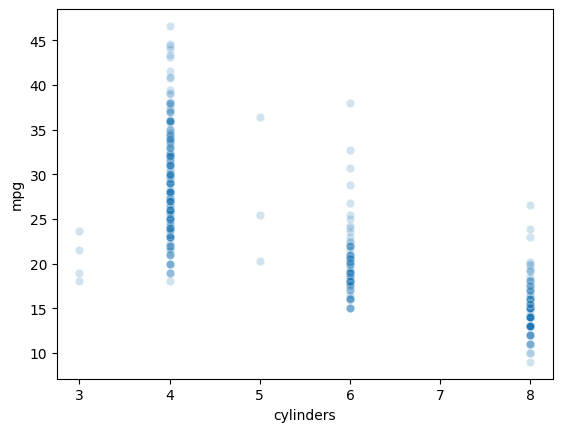

In [120]:

sns.scatterplot(x="cylinders", y="mpg", data=auto_mpg, alpha = 0.2);

Seems to be true. As cylinder increases, the range of MPG decreases.

Lets check with a correlation matrix some of the other metrics.

### Correlation matrix

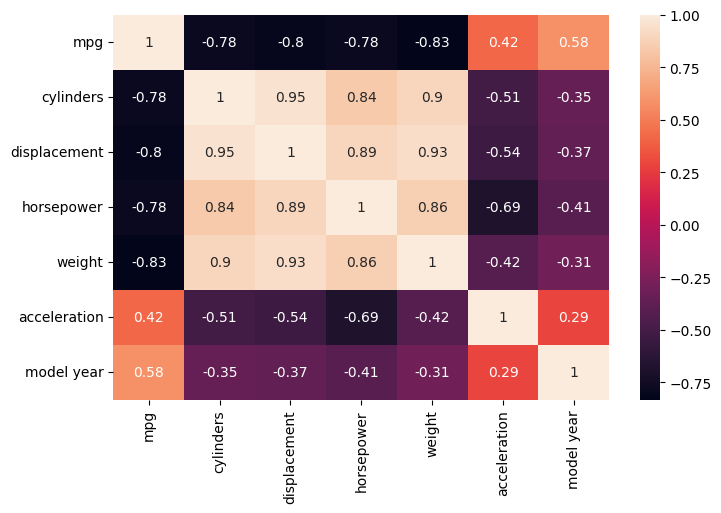

In [141]:
auto_mpg["horsepower"] = pd.to_numeric(auto_mpg["horsepower"]) # there were only 2-3 missing horsepower values so looked them up and added manually for easier managing.
plt.figure(figsize=(8,5))
sns.heatmap(auto_mpg.corr(numeric_only=True), annot=True); #shows the data where each value of a matrix is represented as a color
#plt.title('Heatmap displaying the relationship between data') #set title


The range of values for the correlation coefficient is -1.0 to 1.0.

* -1.0 indicates a perfect negative correlation.
* 1.0 indicates a perfect positive correlation.
* greater than zero, it is a positive relationship.
* less than zero, it is a negative relationship.
* is zero indicates that there is no relationship between the two variables.

Weight, horsepower, displacement and cylinders all affect fuel conspumption negativly. 

Accelaration and most of all model year affect it positively.

### Checking fuel efficency depending on origin of the car

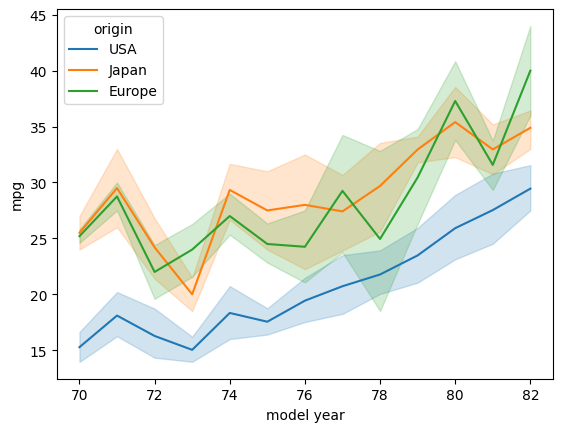

In [136]:
auto_mpg["origin"] = auto_mpg["origin"].astype(str)
auto_mpg["origin"].replace({"1": "USA", "2": "Europe", "3": "Japan" }, inplace=True)
sns.lineplot(data = auto_mpg, x="model year", y="mpg",hue="origin");


- Japanese cars have consistently been more efficient than cars from USA
- Fuel efficiency by USA is always less.
- Europe had a period of large variance on fuel efficiancy with the 1978 models but quickly reversed the trend.

All three regions seem to have a trend of focusing on improving fuel efficiency with Japan and Europe generally leading the way.

### Conlcusions on Fuel Efficiancy